In [1]:
import pandas as pd

In [2]:
snps=pd.read_csv("/mnt/lab_data/kundaje/users/anusri/QTLs/bQTLs/src/pu1.txt",header=0,sep='\t')


In [3]:
snps.head()

,Chr,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue
0,chr17,18967176,538,418,120,G,A,0.223048,0.866699,2.331853e-251
1,chr4,176935913,626,597,29,A,C,0.046326,0.543949,4.449643e-162
2,chr1,144534083,618,368,250,T,C,0.404531,0.057295,5.863065e-141
3,chr17,19015381,144,143,1,A,T,0.006944,0.872850,1.040250e-126
4,chr1,17231724,2477,1321,1156,G,A,0.466694,0.255195,9.915948e-114


In [4]:
atac_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/ATAC/summary.mean.variant_scores_new.tsv"
atac_preds_50m="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/ATAC_new_50M/summary.mean.variant_scores_new.tsv"
dnase_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/DNASE_NEW_FULL/summary.mean.variant_scores_new.tsv"

atac_preds_50m = pd.read_csv(atac_preds_50m, sep="\t", header=0)
atac_preds = pd.read_csv(atac_preds, sep="\t", header=0)
dnase_preds = pd.read_csv(dnase_preds, sep="\t", header=0)
print(dnase_preds.shape)

(999799, 23)


In [5]:
snps.head()

,Chr,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue
0,chr17,18967176,538,418,120,G,A,0.223048,0.866699,2.331853e-251
1,chr4,176935913,626,597,29,A,C,0.046326,0.543949,4.449643e-162
2,chr1,144534083,618,368,250,T,C,0.404531,0.057295,5.863065e-141
3,chr17,19015381,144,143,1,A,T,0.006944,0.872850,1.040250e-126
4,chr1,17231724,2477,1321,1156,G,A,0.466694,0.255195,9.915948e-114


In [6]:
snps.shape

(999799, 10)

In [7]:
print(atac_preds.shape)

(999799, 23)


In [8]:
import numpy as np
atac_preds["jsd_sign.mean"] = atac_preds["jsd.mean"] * np.sign(atac_preds["logfc.mean"])
atac_preds_50m["jsd_sign.mean"] = atac_preds_50m["jsd.mean"] * np.sign(atac_preds_50m["logfc.mean"])
dnase_preds["jsd_sign.mean"] = dnase_preds["jsd.mean"] * np.sign(dnase_preds["logfc.mean"])

In [9]:
atac_preds.head()

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,max_percentile.mean.pval,logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,logfc_x_jsd_x_max_percentile.mean,jsd_sign.mean
0,chr17,18967176,A,G,chr17_18967176_A_G,0.311478,0.311478,0.017033,0.052623,0.011653,...,0.024523,0.263315,0.263315,0.003379,0.043836,0.002004,0.013618,0.003758,0.013618,0.052623
1,chr4,176935913,C,A,chr4_176935913_C_A,1.523892,1.523892,0.000073,0.181628,0.000215,...,0.115946,0.737156,0.737156,0.000233,0.082352,0.000300,0.129340,0.000075,0.129340,0.181628
2,chr1,144534083,C,T,chr1_144534083_C_T,-0.233717,0.233717,0.035638,0.025101,0.064513,...,0.021040,-0.201860,0.201860,0.006923,0.021170,0.010960,0.004999,0.012593,-0.004999,-0.025101
3,chr17,19015381,T,A,chr17_19015381_T_A,-0.045305,0.045305,0.378414,0.011349,0.319737,...,0.003597,-0.042740,0.042740,0.083991,0.010690,0.045718,0.000677,0.109582,-0.000677,-0.011349
4,chr1,17231724,A,G,chr1_17231724_A_G,0.008116,0.046234,0.346740,0.008417,0.447890,...,0.005079,0.006339,0.042423,0.074615,0.007741,0.066760,0.000381,0.120123,-0.000015,0.008417


In [10]:
atac_preds = atac_preds[["chr", "pos", "allele1", "allele2", "logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]]

atac_preds_50m = atac_preds_50m[["chr", "pos", "allele1", "allele2", "logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]]

#atac_preds_50m = atac_preds_50m[["chr", "pos", "allele1", "allele2", "logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]]

dnase_preds = dnase_preds[["chr", "pos", "allele1", "allele2", "logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]]


In [11]:
rename_list=["logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]

rename_df={}
for val in rename_list:
    snps["ENCSR637XSC."+val] = atac_preds[val]
    


In [12]:
rename_list=["logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]

rename_df={}
for val in rename_list:
    snps["ENCSR637XSC.sub.50M."+val] = atac_preds_50m[val]
    


In [13]:
rename_list=["logfc.mean", "jsd_sign.mean", "abs_logfc_x_jsd_x_max_percentile.mean", "abs_logfc_x_jsd_x_max_percentile.mean.pval"]

rename_df={}
for val in rename_list:
    #snps["ENCSR000EMT."+val] = np.nan
    snps["ENCSR000EMT."+val] = dnase_preds[val]
    #print(dnase_preds.shape)
    #snps.loc[snps["pvalue"]<1e-4, "ENCSR000EMT."+val] = dnase_preds[val]
    


In [14]:
#snps[["Chr", "position", "ALTallele",  "POSTallele", "POSTfreq", "prechipfreq"]].to_csv("/mnt/lab_data2/anusri/enformer/bqtls/source_new.tsv", sep="\t", header=True, index=False)


In [15]:
snps[snps["pvalue"]<1e-4].shape


#["Chr", "position", "ALTallele"

(4834, 22)

In [16]:
snps.head(1).columns

Index(['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele',
       'POSTallele', 'POSTfreq', 'prechipfreq', 'pvalue',
       'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval'],
      dtype='object')

In [17]:
#enforer_recomputed_preds
import pickle as pkl
import os

mean_change=[]
rsids=[]

enf_dir="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/enformer_preds_small_window/"

enformer_recompute = pkl.load(open(enf_dir+"/predictions_at_snp.pkl",'rb'))
for i in range(enformer_recompute["ref_logcount_preds"].shape[0]):
        #mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440:456].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440:456].sum()+1)))
        mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440+4:456-4].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440+4:456-4].sum()+1)))

        rsids.append(enformer_recompute["rsids"][i])
mean_change = np.array(mean_change)


In [18]:
len(mean_change)

4834

In [19]:
snps["enformer_recomputed"] = np.nan
snps.loc[snps["pvalue"]<1e-4, "enformer_recomputed"] = mean_change

In [20]:
snps[snps["pvalue"]<1e-4]["enformer_recomputed"]

0      -0.002552
1      -1.120932
2       0.153377
3      -0.008300
4      -0.083050
          ...   
4829   -0.034756
4830   -0.002839
4831    0.155287
4832   -0.006479
4833    0.182051
Name: enformer_recomputed, Length: 4834, dtype: float64

In [21]:
snps.columns

Index(['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele',
       'POSTallele', 'POSTfreq', 'prechipfreq', 'pvalue',
       'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'enformer_recomputed'],
      dtype='object')

In [22]:
enformer_preds = pd.read_csv("/mnt/lab_data2/anusri/enformer/bqtls/enformer_predictions_new.tsv", sep="\t", header=0)

In [23]:
enformer_preds.head()

,chr,pos,ref,alt,rsid,DNASE_SAD,DNASE_SAR
0,chr17,14320,G,A,rs7210283,0.000003,0.000004
1,chr17,14678,A,C,rs113247765,-0.000057,-0.000080
2,chr17,35514,A,C,rs8066551,-0.000435,-0.000601
3,chr17,35724,G,C,rs6565729,0.000144,0.000199
4,chr17,48103,C,T,rs113075245,-0.000002,-0.000003


In [24]:
snps.head(1)

,Chr,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue,...,ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR637XSC.sub.50M.logfc.mean,ENCSR637XSC.sub.50M.jsd_sign.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed
0,chr17,18967176,538,418,120,G,A,0.223048,0.866699,2.331853e-251,...,0.003758,0.292107,0.048839,0.012185,0.333333,0.387608,0.040921,0.015074,0.333333,-0.002552


In [25]:
df1 = snps.merge(enformer_preds, right_on=["chr", "pos", "ref", "alt"], left_on=["Chr", "position",  "POSTallele", "ALTallele"], how="left")
df2 = snps.merge(enformer_preds, right_on=["chr", "pos", "alt", "ref"], left_on=["Chr", "position",  "POSTallele", "ALTallele"], how="left")
df2["DNASE_SAD"] = df2["DNASE_SAD"] * -1
df2["DNASE_SAR"] = df2["DNASE_SAR"] * -1



In [26]:
df1.shape

(999799, 30)

In [27]:
df2.shape

(999799, 30)

In [28]:
sum(~np.isnan(df1["DNASE_SAD"]))

881752

In [29]:
sum(~np.isnan(df2["DNASE_SAD"]))

105717

In [30]:
df1[np.isnan(df1["DNASE_SAD"])]["DNASE_SAD"] = df2[np.isnan(df1["DNASE_SAD"])]["DNASE_SAD"]
df1[np.isnan(df1["DNASE_SAD"])]["DNASE_SAR"] = df2[np.isnan(df1["DNASE_SAD"])]["DNASE_SAR"]

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df1.columns

Index(['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele',
       'POSTallele', 'POSTfreq', 'prechipfreq', 'pvalue',
       'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'enformer_recomputed', 'chr', 'pos', 'ref', 'alt', 'rsid', 'DNASE_SAD',
       'DNASE_SAR'],
      dtype='object')

In [32]:
dff = df1[['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele', "enformer_recomputed",
       'POSTallele', 'POSTfreq', 'prechipfreq', 'pvalue',
       'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
        'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval', 'rsid', 'DNASE_SAD', 'DNASE_SAR']]

In [33]:
dff.shape



(999799, 26)

In [34]:
#dff["IsUsed"] = (~np.isnan(dff["DNASE_SAD"])) & (sig_vars_in_bed["count"])
dff["notnan"] = ~np.isnan(dff["DNASE_SAD"])

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
sum(dff["notnan"]  & (dff["pvalue"]<1e-4))

3818

In [36]:
dff["isused"]  = dff["notnan"]  & (dff["pvalue"]<1e-4)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
sum(dff["isused"])

3818

In [38]:
dff.head()

,Chr,position,Depth,ALTdepth,REFDepth,ALTallele,enformer_recomputed,POSTallele,POSTfreq,prechipfreq,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,rsid,DNASE_SAD,DNASE_SAR,notnan,isused
0,chr17,18967176,538,418,120,G,-0.002552,A,0.223048,0.866699,...,0.333333,0.387608,0.040921,0.015074,0.333333,rs78457033,-0.000056,-0.000062,True,True
1,chr4,176935913,626,597,29,A,-1.120932,C,0.046326,0.543949,...,0.333333,0.959273,0.114225,0.033176,0.333333,NaN,NaN,NaN,False,False
2,chr1,144534083,618,368,250,T,0.153377,C,0.404531,0.057295,...,0.333333,-0.108457,-0.020702,0.002042,0.333333,NaN,NaN,NaN,False,False
3,chr17,19015381,144,143,1,A,-0.008300,T,0.006944,0.872850,...,0.333333,-0.039627,-0.013220,0.000582,0.333333,NaN,NaN,NaN,False,False
4,chr1,17231724,2477,1321,1156,G,-0.083050,A,0.466694,0.255195,...,0.333333,0.014333,0.017591,0.000461,0.333333,NaN,NaN,NaN,False,False


In [39]:
dff['logratio']=np.log2((dff['prechipfreq'].astype(float)+.01)/(dff['POSTfreq'].astype(float)+0.01))

dff.columns

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele',
       'enformer_recomputed', 'POSTallele', 'POSTfreq', 'prechipfreq',
       'pvalue', 'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval', 'rsid',
       'DNASE_SAD', 'DNASE_SAR', 'notnan', 'isused', 'logratio'],
      dtype='object')

In [40]:
rename_dict = {'Chr': 'var.chr', 'position': 'var.pos_hg19', 'Depth': 'obs.depth', 'ALTdepth': 'obs.ALTdepth', 'REFDepth': 'obs.REFdepth', 
        'ALTallele':'var.ALTallele', "logratio": "obs.chiplogratio", 
       'enformer_recomputed': 'pred.enformer.encsr000emt.variantscore.local_logfc',
        'POSTallele': 'var.POSTallele',
        'POSTfreq': 'obs.POSTfreq', 
        'prechipfreq': 'obs:prechipfreq',
       'pvalue': 'obs.pval',
        'ENCSR637XSC.logfc.mean': 'pred.chrombpnet.encsr637xsc.variantscore.logfc' , 
        'ENCSR637XSC.jsd_sign.mean': 'pred.chrombpnet.encsr637xsc.variantscore.jsd',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean': 'pred.chrombpnet.encsr637xsc.variantscore.ips',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval': 'pred.chrombpnet.encsr637xsc.variantscore.ips.pval',
       'ENCSR637XSC.sub.50M.logfc.mean': 'pred.chrombpnet.encsr637xsc_50m.variantscore.logfc', 
        'ENCSR637XSC.sub.50M.jsd_sign.mean': 'pred.chrombpnet.encsr637xsc_50m.variantscore.jsd',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean': 'pred.chrombpnet.encsr637xsc_50m.variantscore.ips',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval': 'pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval',
       'ENCSR000EMT.logfc.mean' : 'pred.chrombpnet.encsr000emt.variantscore.logfc',
       'ENCSR000EMT.jsd_sign.mean': 'pred.chrombpnet.encsr000emt.variantscore.jsd',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean': 'pred.chrombpnet.encsr000emt.variantscore.ips',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval': 'pred.chrombpnet.encsr000emt.variantscore.ips.pval',
        'rsid': "var.rsid",
       'DNASE_SAD': "pred.enformer.encsr000emt.variantscore.global_sad", 
        'DNASE_SAR': "pred.enformer.encsr000emt.variantscore.global_sar", 
        'isused': 'var.isused'
    
}

dff = dff.rename(columns=rename_dict)


In [41]:
dff.head()

,var.chr,var.pos_hg19,obs.depth,obs.ALTdepth,obs.REFdepth,var.ALTallele,pred.enformer.encsr000emt.variantscore.local_logfc,var.POSTallele,obs.POSTfreq,obs:prechipfreq,...,pred.chrombpnet.encsr000emt.variantscore.logfc,pred.chrombpnet.encsr000emt.variantscore.jsd,pred.chrombpnet.encsr000emt.variantscore.ips,pred.chrombpnet.encsr000emt.variantscore.ips.pval,var.rsid,pred.enformer.encsr000emt.variantscore.global_sad,pred.enformer.encsr000emt.variantscore.global_sar,notnan,var.isused,obs.chiplogratio
0,chr17,18967176,538,418,120,G,-0.002552,A,0.223048,0.866699,...,0.387608,0.040921,0.015074,0.333333,rs78457033,-0.000056,-0.000062,True,True,1.911452
1,chr4,176935913,626,597,29,A,-1.120932,C,0.046326,0.543949,...,0.959273,0.114225,0.033176,0.333333,NaN,NaN,NaN,False,False,3.297883
2,chr1,144534083,618,368,250,T,0.153377,C,0.404531,0.057295,...,-0.108457,-0.020702,0.002042,0.333333,NaN,NaN,NaN,False,False,-2.622909
3,chr17,19015381,144,143,1,A,-0.008300,T,0.006944,0.872850,...,-0.039627,-0.013220,0.000582,0.333333,NaN,NaN,NaN,False,False,5.703284
4,chr1,17231724,2477,1321,1156,G,-0.083050,A,0.466694,0.255195,...,0.014333,0.017591,0.000461,0.333333,NaN,NaN,NaN,False,False,-0.846009


In [42]:
dff.columns

Index(['var.chr', 'var.pos_hg19', 'obs.depth', 'obs.ALTdepth', 'obs.REFdepth',
       'var.ALTallele', 'pred.enformer.encsr000emt.variantscore.local_logfc',
       'var.POSTallele', 'obs.POSTfreq', 'obs:prechipfreq', 'obs.pval',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.ips',
       'pred.chrombpnet.encsr637xsc.variantscore.ips.pval',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval',
       'pred.chrombpnet.encsr000emt.variantscore.logfc',
       'pred.chrombpnet.encsr000emt.variantscore.jsd',
       'pred.chrombpnet.encsr000emt.variantscore.ips',
       'pred.chrombpnet.encsr000emt.variantscore.ips.pval', 'var.rsid',
       'pred.enformer.encsr000emt.variantscore.global_sad',
  

In [43]:
dff['pred.enformer.encsr000emt.variantscore.local_logfc'] = -1*dff['pred.enformer.encsr000emt.variantscore.local_logfc']

In [44]:
dataf=dff[['var.chr', 'var.pos_hg19', 'var.isused', 'var.POSTallele',  'var.ALTallele',   'obs.chiplogratio',
        'obs.POSTfreq', 'obs:prechipfreq', 'obs.pval',
         'obs.depth', 'obs.ALTdepth', 'obs.REFdepth',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
        'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.ips',
       'pred.chrombpnet.encsr637xsc.variantscore.ips.pval',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval',
       'pred.chrombpnet.encsr000emt.variantscore.logfc',
       'pred.chrombpnet.encsr000emt.variantscore.jsd',
       'pred.chrombpnet.encsr000emt.variantscore.ips',
       'pred.chrombpnet.encsr000emt.variantscore.ips.pval', 
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar', 
        'var.rsid',
       ]]

In [45]:
dataf

,var.chr,var.pos_hg19,var.isused,var.POSTallele,var.ALTallele,obs.chiplogratio,obs.POSTfreq,obs:prechipfreq,obs.pval,obs.depth,...,pred.chrombpnet.encsr637xsc_50m.variantscore.jsd,pred.chrombpnet.encsr637xsc_50m.variantscore.ips,pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval,pred.chrombpnet.encsr000emt.variantscore.logfc,pred.chrombpnet.encsr000emt.variantscore.jsd,pred.chrombpnet.encsr000emt.variantscore.ips,pred.chrombpnet.encsr000emt.variantscore.ips.pval,pred.enformer.encsr000emt.variantscore.global_sad,pred.enformer.encsr000emt.variantscore.global_sar,var.rsid
0,chr17,18967176,True,A,G,1.911452,0.223048,0.866699,2.331853e-251,538,...,0.048839,0.012185,0.333333,0.387608,0.040921,0.015074,0.333333,-0.000056,-0.000062,rs78457033
1,chr4,176935913,False,C,A,3.297883,0.046326,0.543949,4.449643e-162,626,...,0.175100,0.068898,0.333333,0.959273,0.114225,0.033176,0.333333,NaN,NaN,NaN
2,chr1,144534083,False,C,T,-2.622909,0.404531,0.057295,5.863065e-141,618,...,-0.030988,0.004123,0.333333,-0.108457,-0.020702,0.002042,0.333333,NaN,NaN,NaN
3,chr17,19015381,False,T,A,5.703284,0.006944,0.872850,1.040250e-126,144,...,-0.007095,0.000153,0.333333,-0.039627,-0.013220,0.000582,0.333333,NaN,NaN,NaN
4,chr1,17231724,False,A,G,-0.846009,0.466694,0.255195,9.915948e-114,2477,...,0.011712,0.000279,0.333333,0.014333,0.017591,0.000461,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999794,chr7,72298789,False,C,T,-0.002617,0.981308,0.979512,1.000000e+00,214,...,-0.017103,0.000399,0.333333,0.026360,0.028115,0.001498,0.333333,0.000777,0.000954,rs7794851
999795,chr18,46347288,False,A,G,-0.000083,0.972477,0.972421,1.000000e+00,109,...,-0.005900,0.000017,0.333333,-0.008913,-0.007372,0.000056,0.505239,0.000094,0.000108,rs75500680
999796,chr18,55508743,False,A,G,0.009693,0.969231,0.975832,1.000000e+00,65,...,0.023376,0.000460,0.333333,0.043806,0.014748,0.000176,0.382899,0.000035,0.000046,rs3915603
999797,chr19,16245697,False,A,G,0.005451,0.972477,0.976196,1.000000e+00,109,...,0.018938,0.000909,0.333333,0.076240,0.020574,0.001176,0.333333,-0.000490,-0.000483,rs55663102


In [46]:
dataf.shape

(999799, 28)

In [47]:
dataf.columns

Index(['var.chr', 'var.pos_hg19', 'var.isused', 'var.POSTallele',
       'var.ALTallele', 'obs.chiplogratio', 'obs.POSTfreq', 'obs:prechipfreq',
       'obs.pval', 'obs.depth', 'obs.ALTdepth', 'obs.REFdepth',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.ips',
       'pred.chrombpnet.encsr637xsc.variantscore.ips.pval',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval',
       'pred.chrombpnet.encsr000emt.variantscore.logfc',
       'pred.chrombpnet.encsr000emt.variantscore.jsd',
       'pred.chrombpnet.encsr000emt.variantscore.ips',
       'pred.chrombpnet.encsr000emt.variantscore.ips.pval',
       'pred.enformer.encsr000emt

In [48]:
dataf.to_csv("full_variants/bqtls.pu1.lcls.benchmarking.all.tsv", sep="\t", header=True, index=False)


In [49]:
data_final = dataf[dataf['var.isused']]

In [50]:
data_final.shape

(3818, 28)

In [51]:
data_final.to_csv("filtered_variants/bqtls.pu1.lcls.benchmarking.chrombpnet.tsv", sep="\t", header=True, index=False)

In [52]:
dataf.head()

,var.chr,var.pos_hg19,var.isused,var.POSTallele,var.ALTallele,obs.chiplogratio,obs.POSTfreq,obs:prechipfreq,obs.pval,obs.depth,...,pred.chrombpnet.encsr637xsc_50m.variantscore.jsd,pred.chrombpnet.encsr637xsc_50m.variantscore.ips,pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval,pred.chrombpnet.encsr000emt.variantscore.logfc,pred.chrombpnet.encsr000emt.variantscore.jsd,pred.chrombpnet.encsr000emt.variantscore.ips,pred.chrombpnet.encsr000emt.variantscore.ips.pval,pred.enformer.encsr000emt.variantscore.global_sad,pred.enformer.encsr000emt.variantscore.global_sar,var.rsid
0,chr17,18967176,True,A,G,1.911452,0.223048,0.866699,2.331853e-251,538,...,0.048839,0.012185,0.333333,0.387608,0.040921,0.015074,0.333333,-0.000056,-0.000062,rs78457033
1,chr4,176935913,False,C,A,3.297883,0.046326,0.543949,4.449643e-162,626,...,0.175100,0.068898,0.333333,0.959273,0.114225,0.033176,0.333333,NaN,NaN,NaN
2,chr1,144534083,False,C,T,-2.622909,0.404531,0.057295,5.863065e-141,618,...,-0.030988,0.004123,0.333333,-0.108457,-0.020702,0.002042,0.333333,NaN,NaN,NaN
3,chr17,19015381,False,T,A,5.703284,0.006944,0.872850,1.040250e-126,144,...,-0.007095,0.000153,0.333333,-0.039627,-0.013220,0.000582,0.333333,NaN,NaN,NaN
4,chr1,17231724,False,A,G,-0.846009,0.466694,0.255195,9.915948e-114,2477,...,0.011712,0.000279,0.333333,0.014333,0.017591,0.000461,0.333333,NaN,NaN,NaN


<AxesSubplot:>

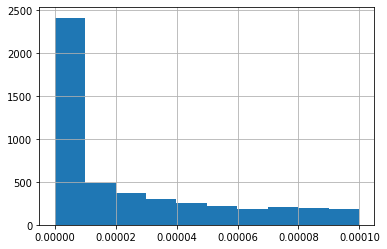

In [53]:
dataf.head(4834)["obs.pval"].hist()

In [54]:
np.max(dataf.head(4834)["obs.pval"])

9.98768419817e-05

In [55]:
np.min(dataf.head(4834)["obs.pval"])

0.0

In [56]:
dataf.loc[4838,:]

var.chr                                                      chr10
var.pos_hg19                                              90754953
var.isused                                                   False
var.POSTallele                                                   T
var.ALTallele                                                    G
obs.chiplogratio                                         -1.593873
obs.POSTfreq                                              0.309524
obs:prechipfreq                                           0.095852
obs.pval                                                  0.000101
obs.depth                                                       42
obs.ALTdepth                                                    29
obs.REFdepth                                                    13
pred.enformer.encsr000emt.variantscore.local_logfc             NaN
pred.chrombpnet.encsr637xsc.variantscore.logfc            0.047596
pred.chrombpnet.encsr637xsc.variantscore.jsd              0.00

In [57]:

newd=dataf.head(4834)

In [58]:
newd["pos0"] = newd["var.pos_hg19"] - 1
selected_beds = newd[["var.chr", "pos0", "var.pos_hg19"]+newd.columns[2:-1].tolist()]
selected_beds.head()

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,var.chr,pos0,var.pos_hg19,var.isused,var.POSTallele,var.ALTallele,obs.chiplogratio,obs.POSTfreq,obs:prechipfreq,obs.pval,...,pred.chrombpnet.encsr637xsc_50m.variantscore.jsd,pred.chrombpnet.encsr637xsc_50m.variantscore.ips,pred.chrombpnet.encsr637xsc_50m.variantscore.ips.pval,pred.chrombpnet.encsr000emt.variantscore.logfc,pred.chrombpnet.encsr000emt.variantscore.jsd,pred.chrombpnet.encsr000emt.variantscore.ips,pred.chrombpnet.encsr000emt.variantscore.ips.pval,pred.enformer.encsr000emt.variantscore.global_sad,pred.enformer.encsr000emt.variantscore.global_sar,var.rsid
0,chr17,18967175,18967176,True,A,G,1.911452,0.223048,0.866699,2.331853e-251,...,0.048839,0.012185,0.333333,0.387608,0.040921,0.015074,0.333333,-0.000056,-0.000062,rs78457033
1,chr4,176935912,176935913,False,C,A,3.297883,0.046326,0.543949,4.449643e-162,...,0.175100,0.068898,0.333333,0.959273,0.114225,0.033176,0.333333,NaN,NaN,NaN
2,chr1,144534082,144534083,False,C,T,-2.622909,0.404531,0.057295,5.863065e-141,...,-0.030988,0.004123,0.333333,-0.108457,-0.020702,0.002042,0.333333,NaN,NaN,NaN
3,chr17,19015380,19015381,False,T,A,5.703284,0.006944,0.872850,1.040250e-126,...,-0.007095,0.000153,0.333333,-0.039627,-0.013220,0.000582,0.333333,NaN,NaN,NaN
4,chr1,17231723,17231724,False,A,G,-0.846009,0.466694,0.255195,9.915948e-114,...,0.011712,0.000279,0.333333,0.014333,0.017591,0.000461,0.333333,NaN,NaN,NaN


In [59]:
selected_beds.shape

(4834, 29)

In [60]:
peaks_bed = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/ENCFF306SRV.bed.gz", sep="\t", header=None)

peaks_bed[1] = peaks_bed[1] + peaks_bed[9] - 100
peaks_bed[2] = peaks_bed[1] + 200

In [61]:
import pybedtools
beds_var = pybedtools.BedTool.from_dataframe(selected_beds)
peak_bed = pybedtools.BedTool('/mnt/lab_data2/anusri/chromatin-atlas-anvil/data/afgr_data/peak_files/merged.peaks.af.top.50k.bed')
sig_vars_in_bed = beds_var.intersect(peak_bed, c=True)

In [62]:
sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=selected_beds.columns.tolist() + ["count"])


In [63]:
sum(sig_vars_in_bed["count"]>0)

154

In [72]:

readme_data = {'var.chr' : "Chromosome of the variant (GRCh37)", 
        'var.pos_hg19': "Position of the variant (GRCh37, 1-based)",
        'var.POSTallele': "POST Allele for the variant", 
        'var.ALTallele': "ALT Allele for the variant",   
       'obs.chiplogratio': "Observed effect size", 
       'obs.pval': "Significance p-value associated with observed effect sizes", 
       'var.isused': "True if variant is used in final ChromBPNet benchmarking",
       'pred.gkmsvm.encsr000emt.varscore.deltasvm' : "deltasvm predictions in encsr000emt",
       'pred.enformer.encsr000emt.varscore.global_sad': "Enformer SAD predictions (downloaded) in encsr000emt",
       'pred.enformer.encsr000emt.varscore.global_sar': "Enformer SAR predictions (downloaded) in encsr000emt",
       'pred.enformer.encsr000emt.varscore.local_logfc': "Enformer logFC (local) predictions (re-computed) in encsr000emt",
       'pred.chrombpnet.xxx.varscore.logfc': "ChromBPNet logFC predictions in encid xxx",
       'pred.chrombpnet.xxx.varscore.jsd':  "ChromBPNet JSD predictions in encid xxx", 
       'pred.chrombpnet.xxx.varscore.ips': "ChromBPNet IPS predictions in encid xxx",
       'pred.chrombpnet.xxx.varscore.ips.pval': "p-value significance of the ChromBPNet IPS predictions in encid xxx",
       'obs.POSTfreq': "POST allele ChIP frequencies", 
       'obs:prechipfreq': "ALT allele ChIP frequencies",
       'obs.depth': "variant attribute accompanied with original source", 
      'obs.ALTdepth': "variant attribute accompanied with original source",
      'obs.REFdepth': "variant attribute accompanied with original source"}


In [73]:
f = open("full_variants/bqtls.pu1.lcls.benchmarking.all.README", "w")
f.write("# TSV Field Header Descriptions \n \n")
for val in readme_data:
    print(val)
    f.write(val+" : "+readme_data[val]+"\n")
f.write("\n")
f.write("# Experiment-Specific Headers and IDs  \n")
f.close()

var.chr
var.pos_hg19
var.POSTallele
var.ALTallele
obs.chiplogratio
obs.pval
var.isused
pred.gkmsvm.encsr000emt.varscore.deltasvm
pred.enformer.encsr000emt.varscore.global_sad
pred.enformer.encsr000emt.varscore.global_sar
pred.enformer.encsr000emt.varscore.local_logfc
pred.chrombpnet.xxx.varscore.logfc
pred.chrombpnet.xxx.varscore.jsd
pred.chrombpnet.xxx.varscore.ips
pred.chrombpnet.xxx.varscore.ips.pval
obs.POSTfreq
obs:prechipfreq
obs.depth
obs.ALTdepth
obs.REFdepth
